<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data_multi_delta_(1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.6_n250.csv',
 'data_multi_delta_1.6_n120.csv',
 'data_multi_delta_1.6_n60.csv',
 'data_multi_delta_1.6_n30.csv',
 'data_multi_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.963283,74.670065,86.722100,35.126500,16.741959,255.223909,212.426900,42.797009
1,0.0,1.0,81.587001,61.070677,24.851445,26.957263,-15.935888,188.530497,214.585125,-26.054628
2,0.0,2.0,88.484810,42.960280,73.385706,75.284242,-13.942427,276.172611,284.469794,-8.297183
3,0.0,3.0,81.217791,30.689180,74.909968,36.116432,27.075071,260.008442,230.816878,29.191564
4,0.0,4.0,47.170207,94.932031,48.413948,85.707557,-65.775105,220.448637,268.327372,-47.878734
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,56.294639,97.934952,44.840785,64.568996,39.094221,312.733593,262.968966,49.764627
29996,999.0,26.0,56.918457,54.372299,76.892362,80.326486,14.089793,292.599398,273.715499,18.883899
29997,999.0,27.0,66.112189,31.550102,95.733923,58.907150,3.412130,265.715493,268.394782,-2.679289
29998,999.0,28.0,35.417928,48.021334,81.429747,72.676202,-45.649367,201.895845,238.557722,-36.661878


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.963283,74.670065,86.722100,35.126500,16.741959,255.223909,212.426900,42.797009
1,0.0,1.0,81.587001,61.070677,24.851445,26.957263,-15.935888,188.530497,214.585125,-26.054628
2,0.0,2.0,88.484810,42.960280,73.385706,75.284242,-13.942427,276.172611,284.469794,-8.297183
3,0.0,3.0,81.217791,30.689180,74.909968,36.116432,27.075071,260.008442,230.816878,29.191564
4,0.0,4.0,47.170207,94.932031,48.413948,85.707557,-65.775105,220.448637,268.327372,-47.878734
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,56.294639,97.934952,44.840785,64.568996,39.094221,312.733593,262.968966,49.764627
29996,999.0,26.0,56.918457,54.372299,76.892362,80.326486,14.089793,292.599398,273.715499,18.883899
29997,999.0,27.0,66.112189,31.550102,95.733923,58.907150,3.412130,265.715493,268.394782,-2.679289
29998,999.0,28.0,35.417928,48.021334,81.429747,72.676202,-45.649367,201.895845,238.557722,-36.661878


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    31.963283  74.670065  86.722100  35.126500  16.741959   
      1.0    81.587001  61.070677  24.851445  26.957263 -15.935888   
      2.0    88.484810  42.960280  73.385706  75.284242 -13.942427   
      3.0    81.217791  30.689180  74.909968  36.116432  27.075071   
      4.0    47.170207  94.932031  48.413948  85.707557 -65.775105   
...                ...        ...        ...        ...        ...   
999.0 25.0   56.294639  97.934952  44.840785  64.568996  39.094221   
      26.0   56.918457  54.372299  76.892362  80.326486  14.089793   
      27.0   66.112189  31.550102  95.733923  58.907150   3.412130   
      28.0   35.417928  48.021334  81.429747  72.676202 -45.649367   
      29.0   38.694617  84.316419  57.707614  66.684819 -22.880511   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    255.223909  212.426900  42.797009  
      1.0    188.530497  214.585125 -26.054628  
      2.0    276.172611  284.469794  -8.297183  
      3.0    260.008442  230.816878  29.191564  
      4.0    220.448637  268.327372 -47.878734  
...                 ...         ...        ...  
999.0 25.0   312.733593  262.968966  49.764627  
      26.0   292.599398  273.715499  18.883899  
      27.0   265.715493  268.394782  -2.679289  
      28.0   201.895845  238.557722 -36.661878  
      29.0   234.522958  244.239487  -9.716529  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    31.963283  74.670065  86.722100  35.126500  16.741959   
      1.0    81.587001  61.070677  24.851445  26.957263 -15.935888   
      2.0    88.484810  42.960280  73.385706  75.284242 -13.942427   
      3.0    81.217791  30.689180  74.909968  36.116432  27.075071   
      4.0    47.170207  94.932031  48.413948  85.707557 -65.775105   
...                ...        ...        ...        ...        ...   
999.0 25.0   56.294639  97.934952  44.840785  64.568996  39.094221   
      26.0   56.918457  54.372299  76.892362  80.326486  14.089793   
      27.0   66.112189  31.550102  95.733923  58.907150   3.412130   
      28.0   35.417928  48.021334  81.429747  72.676202 -45.649367   
      29.0   38.694617  84.316419  57.707614  66.684819 -22.880511   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    255.223909  212.426900  42.797009  
      1.0    188.530497  214.585125 -26.054628  
      2.0    276.172611  284.469794  -8.297183  
      3.0    260.008442  230.816878  29.191564  
      4.0    220.448637  268.327372 -47.878734  
...                 ...         ...        ...  
999.0 25.0   312.733593  262.968966  49.764627  
      26.0   292.599398  273.715499  18.883899  
      27.0   265.715493  268.394782  -2.679289  
      28.0   201.895845  238.557722 -36.661878  
      29.0   234.522958  244.239487  -9.716529  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,31.963283,74.670065,86.722100,35.126500,16.741959,255.223909,212.426900,42.797009
1,0.0,1.0,81.587001,61.070677,24.851445,26.957263,-15.935888,188.530497,214.585125,-26.054628
2,0.0,2.0,88.484810,42.960280,73.385706,75.284242,-13.942427,276.172611,284.469794,-8.297183
3,0.0,3.0,81.217791,30.689180,74.909968,36.116432,27.075071,260.008442,230.816878,29.191564
4,0.0,4.0,47.170207,94.932031,48.413948,85.707557,-65.775105,220.448637,268.327372,-47.878734
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,56.294639,97.934952,44.840785,64.568996,39.094221,312.733593,262.968966,49.764627
29996,999.0,26.0,56.918457,54.372299,76.892362,80.326486,14.089793,292.599398,273.715499,18.883899
29997,999.0,27.0,66.112189,31.550102,95.733923,58.907150,3.412130,265.715493,268.394782,-2.679289
29998,999.0,28.0,35.417928,48.021334,81.429747,72.676202,-45.649367,201.895845,238.557722,-36.661878


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    31.963283  74.670065  86.722100  35.126500  16.741959   
      1.0    81.587001  61.070677  24.851445  26.957263 -15.935888   
      2.0    88.484810  42.960280  73.385706  75.284242 -13.942427   
      3.0    81.217791  30.689180  74.909968  36.116432  27.075071   
      4.0    47.170207  94.932031  48.413948  85.707557 -65.775105   
...                ...        ...        ...        ...        ...   
999.0 25.0   56.294639  97.934952  44.840785  64.568996  39.094221   
      26.0   56.918457  54.372299  76.892362  80.326486  14.089793   
      27.0   66.112189  31.550102  95.733923  58.907150   3.412130   
      28.0   35.417928  48.021334  81.429747  72.676202 -45.649367   
      29.0   38.694617  84.316419  57.707614  66.684819 -22.880511   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    255.223909  212.426900  42.797009  
      1.0    188.530497  214.585125 -26.054628  
      2.0    276.172611  284.469794  -8.297183  
      3.0    260.008442  230.816878  29.191564  
      4.0    220.448637  268.327372 -47.878734  
...                 ...         ...        ...  
999.0 25.0   312.733593  262.968966  49.764627  
      26.0   292.599398  273.715499  18.883899  
      27.0   265.715493  268.394782  -2.679289  
      28.0   201.895845  238.557722 -36.661878  
      29.0   234.522958  244.239487  -9.716529  

[30000 rows x 8 columns]

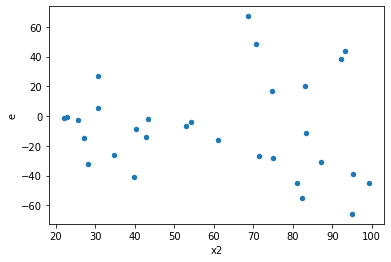

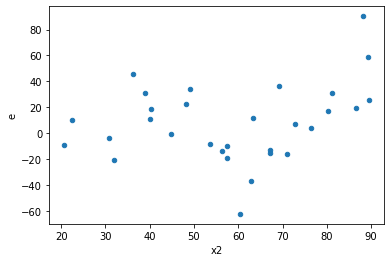

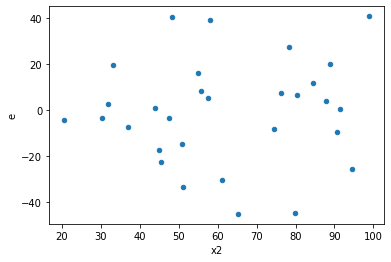

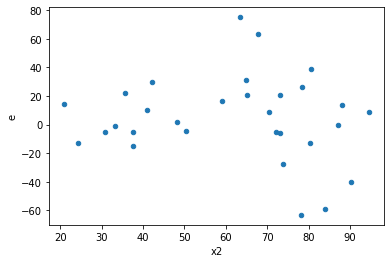

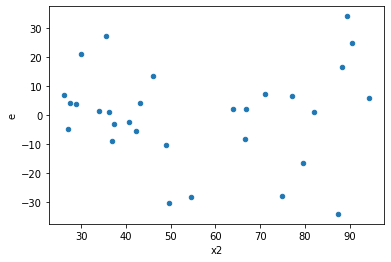

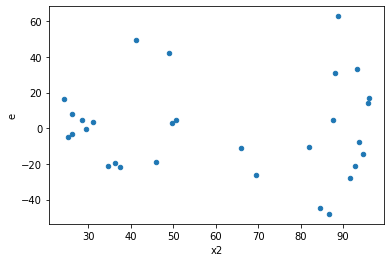

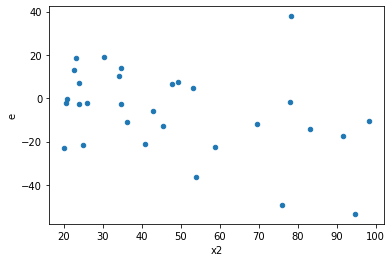

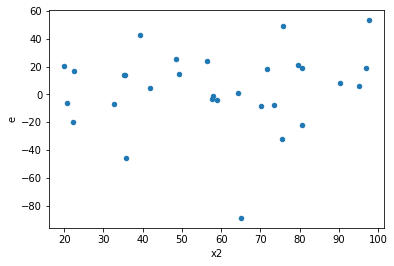

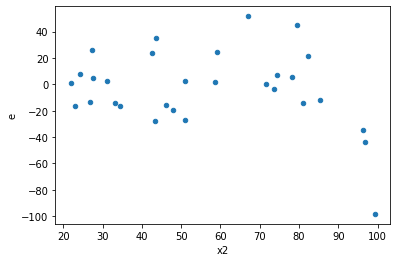

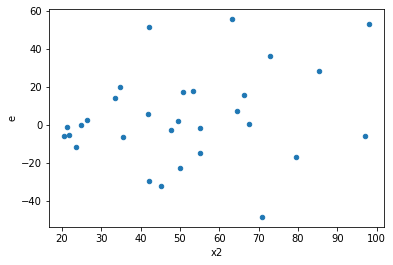

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,1844.7676984650727,11784.55518454053,230.5959623081341,1473.0693980675662,6.388097099892737,0.016690007529123196,0.9916549962354384,0.008345003764561598,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,2379.739913853871,3212.7758624483245,297.46748923173385,401.59698280604056,1.3500533582451004,0.681293776174813,0.6593531119125935,0.3406468880874065,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,1665.2281264776445,3654.4370278889537,208.15351580970557,456.8046284861192,2.194556391272925,0.28711730079092557,0.8564413496045372,0.14355865039546278,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1341.18377145234,10377.186026737743,167.6479714315425,1297.148253342218,7.73733342709665,0.009016222853992062,0.995491888573004,0.004508111426996031,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,692.4920718970342,3109.0728977884555,86.56150898712927,388.63411222355694,4.4896873537791775,0.04822724883377516,0.9758863755831124,0.02411362441688758,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,2503.043248042989,8131.358622486211,312.88040600537363,1016.4198278107764,3.2485889442157005,0.11568286460604993,0.942158567696975,0.057841432303024964,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,741.4057800163921,4926.951587675036,92.67572250204901,615.8689484593795,6.645418366668389,0.014731135428160513,0.9926344322859197,0.007365567714080257,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,3852.696668345264,4698.894537006802,481.587083543158,587.3618171258503,1.2196378125519498,0.7856493181681601,0.60717534091592,0.39282465908408004,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,736.4661302418738,3185.442601614784,92.05826628023422,398.180325201848,4.325307669707235,0.053622131640684856,0.9731889341796576,0.026811065820342428,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,1844.7676984650727,11784.55518454053,230.5959623081341,1473.0693980675662,6.388097099892737,0.016690007529123196,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,2379.739913853871,3212.7758624483245,297.46748923173385,401.59698280604056,1.3500533582451004,0.681293776174813,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,1665.2281264776445,3654.4370278889537,208.15351580970557,456.8046284861192,2.194556391272925,0.28711730079092557,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,1341.18377145234,10377.186026737743,167.6479714315425,1297.148253342218,7.73733342709665,0.009016222853992062,Reject001=0 : Heteroscedasticity
4.0,8.0,8.0,692.4920718970342,3109.0728977884555,86.56150898712927,388.63411222355694,4.4896873537791775,0.04822724883377516,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,2503.043248042989,8131.358622486211,312.88040600537363,1016.4198278107764,3.2485889442157005,0.11568286460604993,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,741.4057800163921,4926.951587675036,92.67572250204901,615.8689484593795,6.645418366668389,0.014731135428160513,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,5082.929861022676,2774.362198077225,635.3662326278345,346.7952747596531,0.545819492681142,0.4099539538927926,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,3852.696668345264,4698.894537006802,481.587083543158,587.3618171258503,1.2196378125519498,0.7856493181681601,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      830
Reject001=0 : Heteroscedasticity    170
Name: Result_test, dtype: int64